## Artificial Intelligence Final Task

Title: "Bridge Card Classification using FastAI"

Member:
1. Tanto Wijaya (1102213211)
2. Ariq Shaquille Baswara (1102213170)

### Impor FastAI & FastBook Library

In [ ]:
# install fastAI & fastbook library
!pip install fastai
!pip install fastbook --upgrade
!pip install -Uqq fastbook

In [2]:
# import fastbook library
import fastbook
fastbook.setup_book()

# import fastAI library
from fastai.vision.all import *

Mounted at /content/gdrive


### Load Bridge Card Dataset

In [3]:
# install gdown for download dataset from google drive
!pip install gdown

# download dataset from google drive
!gdown 10qSSumuCJBfJmNr2zBfcU00wMAAHjEuc

Downloading...
From (original): https://drive.google.com/uc?id=10qSSumuCJBfJmNr2zBfcU00wMAAHjEuc
From (redirected): https://drive.google.com/uc?id=10qSSumuCJBfJmNr2zBfcU00wMAAHjEuc&confirm=t&uuid=f81ec43d-cb13-4b14-a235-d77a88e8d2eb
To: /content/card-classification.zip
100% 404M/404M [00:14<00:00, 28.2MB/s]


In [ ]:
# extract dataset zip file
!unzip card-classification.zip

### Convert the Dataset into Imagenet Style

In [5]:
# import python library needed
import os
import pandas as pd

In [6]:
# create dataset path
DATASET_PATH = '/content/train'

In [7]:
# check the available name classes
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

# show the name classes
class_names

['ace of spades',
 'jack of clubs',
 'king of hearts',
 'five of hearts',
 'five of clubs',
 'four of diamonds',
 'three of spades',
 'two of clubs',
 'four of hearts',
 'eight of hearts',
 'nine of spades',
 'jack of spades',
 'jack of hearts',
 'four of clubs',
 'king of diamonds',
 'two of hearts',
 'seven of hearts',
 'seven of spades',
 'six of diamonds',
 'two of diamonds',
 'queen of spades',
 'six of spades',
 'seven of clubs',
 'seven of diamonds',
 'ace of hearts',
 'king of clubs',
 'nine of hearts',
 'six of hearts',
 'three of diamonds',
 'nine of clubs',
 'queen of clubs',
 'five of diamonds',
 'ace of clubs',
 'eight of spades',
 'four of spades',
 'queen of diamonds',
 'five of spades',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'nine of diamonds',
 'king of spades',
 'three of hearts',
 'queen of hearts',
 'two of spades',
 'eight of clubs',
 'joker',
 'jack of diamonds',
 'ten of clubs',
 'six of clubs',
 'three of clubs',
 'ace of diamonds',
 'eight of 

In [8]:
# list to store the image path and label class
image_paths = []
labels = []


for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [9]:
# create dataframe using pandas
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [10]:
# show the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7624 entries, 0 to 7623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7624 non-null   object
 1   label   7624 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.2+ KB


In [11]:
# show the first five rows of the dataframe
df.head()

,name,label
0,/content/train/ace of spades/031.jpg,0
1,/content/train/ace of spades/075.jpg,0
2,/content/train/ace of spades/089.jpg,0
3,/content/train/ace of spades/011.jpg,0
4,/content/train/ace of spades/160.jpg,0


In [12]:
# show the last five rows of the dataframe
df.tail()

,name,label
7619,/content/train/eight of diamonds/141.jpg,52
7620,/content/train/eight of diamonds/116.jpg,52
7621,/content/train/eight of diamonds/026.jpg,52
7622,/content/train/eight of diamonds/067.jpg,52
7623,/content/train/eight of diamonds/108.jpg,52


In [13]:
# convert dataframe to csv
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

### Load the Data

In [14]:
# create image data loaders with fastAI library
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

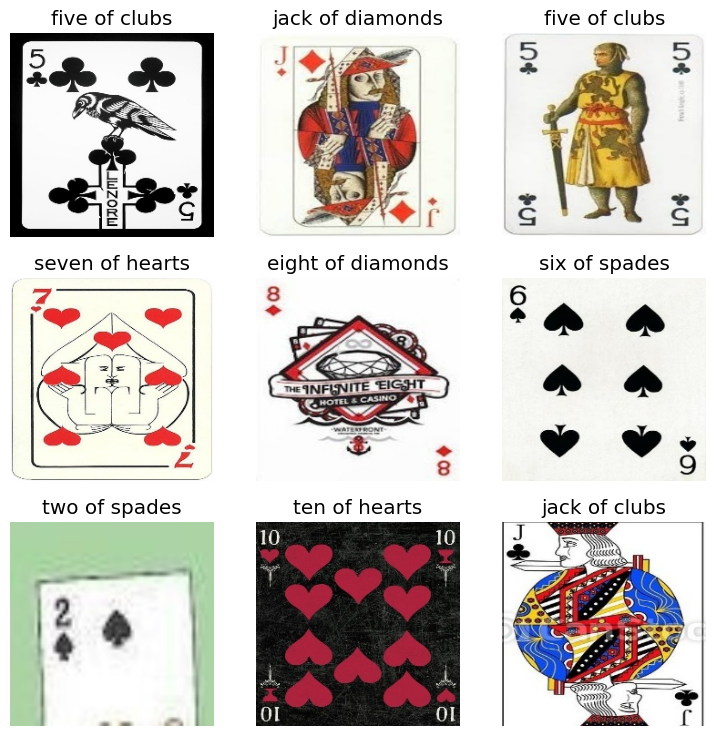

In [15]:
# show the sample for dataset
dls.show_batch()

### Create the Model

In [16]:
# create model using fastAI library
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]


In [17]:
# do fine tuning with 10 epoch
model.fine_tune(
    epochs=10
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.210237,2.390326,0.345144,0.654856,00:59


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.862714,1.346181,0.611549,0.388451,01:20
1,1.170079,0.859043,0.749344,0.250656,01:21
2,0.750479,0.661171,0.809055,0.190945,01:20
3,0.489615,0.504603,0.854987,0.145013,01:25
4,0.281890,0.467248,0.870735,0.129265,01:23
5,0.163883,0.475963,0.869423,0.130577,01:20
6,0.116400,0.376987,0.900262,0.099738,01:20
7,0.049484,0.429457,0.902887,0.097113,01:20
8,0.043404,0.322558,0.914698,0.085302,01:22
9,0.037619,0.338674,0.915354,0.084646,01:21


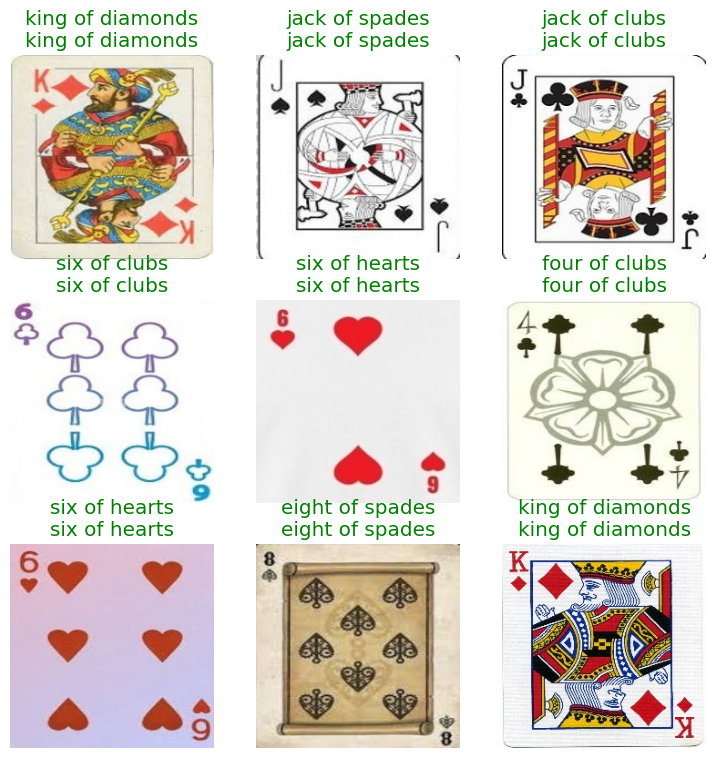

In [19]:
# show model result
model.show_results()

### Save the Model

In [20]:
# save the model
model.export('bridge_card_classifier.pkl')

### Load the Model

In [21]:
# load the brigde card classification model
new_model = load_learner(f'{DATASET_PATH}/bridge_card_classifier.pkl')

### Card Prediction

In [22]:
# download card sample
!gdown --id 1g98lqIfdL3OQVZB5ZfHlfixAJLuH741y

# extract sample zip file
!unzip card-sample.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1g98lqIfdL3OQVZB5ZfHlfixAJLuH741y
To: /content/card-sample.zip
100% 303k/303k [00:00<00:00, 133MB/s]
Archive:  card-sample.zip
  inflating: card-sample/card1.jpg   
  inflating: card-sample/card2.jpg   
  inflating: card-sample/card3.jpg   
  inflating: card-sample/card4.jpg   
  inflating: card-sample/card5.jpg   
  inflating: card-sample/card6.jpg   


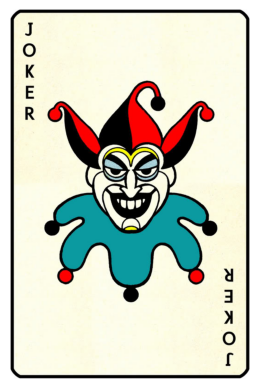

('joker',
 tensor(20),
 tensor([5.2934e-08, 6.2962e-10, 4.1180e-08, 1.9030e-09, 3.9749e-10, 3.4439e-09, 1.0589e-07, 5.4643e-10, 1.7451e-07, 4.3112e-09, 1.5124e-07, 8.0621e-09, 7.1714e-09, 1.1094e-09, 5.4681e-09, 3.4766e-10,
         6.3560e-10, 7.5061e-11, 7.8076e-09, 1.2825e-10, 1.0000e+00, 1.1791e-09, 5.2722e-10, 1.9244e-08, 5.0106e-10, 1.1075e-08, 4.2239e-10, 8.9100e-09, 1.2889e-09, 1.9096e-08, 9.0284e-10, 3.6411e-08,
         1.0675e-09, 2.5948e-09, 8.2749e-10, 8.8987e-08, 6.1679e-10, 5.0874e-09, 1.1584e-08, 4.5131e-08, 1.0857e-10, 1.8438e-07, 7.0991e-10, 2.2090e-08, 3.0454e-08, 2.8535e-08, 2.5675e-08, 3.9926e-08,
         6.0123e-09, 3.3137e-07, 5.3050e-08, 9.0522e-08, 2.1039e-08]))

In [26]:
# do card prediction
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/card-sample/card6.jpg'

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

new_model.predict(
    item = image_path
)